
PROJECT DESCRIPTION
The objective of this project is to construct a machine learning pipeline aimed at predicting the attrition rate of IBM services customers.



HYPOTHESIS
Analyzing the impact of Monthly Charges on the Customer Churn rate

Null Hypothesis: There is no sigificant relationship between Monthly Charges and Customer Churn rate

Alternate Hypothesis: There is a significant impact of Monthly Charges on the Customer Churn rate

ANALYTICAL QUESTIONS
1. Is there a significant difference in churn rates between different demographic groups, such as gender, senior citizens, customers with partners, and those with dependents?
2. Do customers subscribing to additional services (e.g., online security, device protection) exhibit different churn behavior compared to those who do not?
3. What is the impact of different types of contracts (month-to-month, one year, two years) on customer churn rates? Are customers with longer-term contracts more loyal?
4. Does the quality of the network, including the presence of service outages, influence customer satisfaction and subsequently impact churn rates?
5. Are long-term customers less likely to churn compared to newer ones?

DATA UNDERSTANDING

Import all the necessary packages

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import dotenv_values
import plotly.express as px
import seaborn as sns
import pyodbc
import warnings
warnings.filterwarnings('ignore')
import os
import pyxlsx
import pyxlsb


Load the datasets

In [482]:
# Create an environment variable and connect the database

environment_variable = dotenv_values('.env')

server_name = environment_variable.get('server')
username = environment_variable.get('user')
password = environment_variable.get('password')
database_name = environment_variable.get('database')

connection_string = f'DRIVER={{SQL Server}};SERVER={server_name};PWD={password};DATABASE={database_name};UID={username}'

connection = pyodbc.connect(connection_string)

In [483]:
# Load the first dataset from the database
query = 'SELECT * FROM dbo.LP2_Telco_churn_first_3000'
df1 = pd.read_sql(query, connection)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [484]:
df1.shape

(3000, 21)

In [485]:
df2 = pd.read_csv('LP2_Telco-churn-last-2000 (1).csv')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


MERGE THE TWO DATASETS FOR THE ANLYSIS

In [486]:
# Concatenate df1 and df2 as df
df = pd.concat([df1,df2], ignore_index=True)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [487]:
# Check for the shape of the dataframe
df.shape

(5043, 21)

In [488]:
# Check for the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [489]:
# Check for the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


CHECKING FOR THE INCONSISTENCIES IN THE VARIABLE COLUMNS

In [490]:
# Check for the gender column unique values 
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [491]:
# Check for the MonthlyCharges unique values
df.MonthlyCharges.unique()

array([ 29.85000038,  56.95000076,  53.84999847, ...,  78.7       ,
        60.65      , 103.2       ])

In [492]:
# Check for the gender  variable unique value
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [493]:
# check for the senior citizen column unique vales
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [494]:
# Check for totalcharges unique values
df.TotalCharges.unique()

array([29.850000381469727, 1889.5, 108.1500015258789, ..., '346.45',
       '306.6', '6844.5'], dtype=object)

In [495]:
df['TotalCharges'].value_counts()

TotalCharges
20.200000762939453    5
20.450000762939453    5
20.2                  5
19.549999237060547    4
19.65                 4
                     ..
99.75                 1
425.1000061035156     1
2200.25               1
6615.14990234375      1
6844.5                1
Name: count, Length: 4884, dtype: int64

In [496]:
df['TotalCharges'].dtype

dtype('O')

In [497]:
# Convert the non numeric values in the Totalcharges column to NAN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where Totalcharges is NAN
df = df.dropna(subset='TotalCharges')
# Convert the TotalCharges column to integer
df.TotalCharges = df.TotalCharges.astype(int)

In [498]:
# Check for the datatype
df['TotalCharges'].dtype

dtype('int32')

In [499]:
# Check for the MonthlyCharges unique values
df['MonthlyCharges'].unique()

array([ 29.85000038,  56.95000076,  53.84999847, ...,  78.7       ,
        60.65      , 103.2       ])

In [500]:
# Check for the data type
df['MonthlyCharges'].dtype

dtype('float64')

In [501]:
# Check for the null values
df['MonthlyCharges'].isna().sum()

0

In [502]:
# Show PaymentMethod column unique values
df['PaymentMethod'].unique()  

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [503]:
# Check for null values in the PaymentMethod column
df['PaymentMethod'].isna().sum()


0

In [504]:
# Show the unique values for the column PaperlessBilling
df['PaperlessBilling'].unique()

array([True, False, 'Yes', 'No'], dtype=object)

In [505]:
# Check for the PaperlessBilling value counts
df['PaperlessBilling'].value_counts()

PaperlessBilling
True     1775
False    1220
Yes      1218
No        822
Name: count, dtype: int64

In [506]:
# Check for the nan values in PaperlessBilling column
df['PaperlessBilling'].isna().sum()

0

In [507]:
# Convert boolean values to strings
df['PaperlessBilling'] = df['PaperlessBilling'].astype(str)

# Replace boolean values with 'Yes' and 'No'
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'True': 'Yes', 'False': 'No'})

# Check unique values after replacement
print(df['PaperlessBilling'].unique())


['Yes' 'No']


In [508]:
# Show the unique values for the Contract column
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [509]:
# Check for the value count for the Contract column
df.Contract.value_counts()

Contract
Month-to-month    2744
Two year          1237
One year          1054
Name: count, dtype: int64

In [510]:
# Check if there is nan values in the Contract column
df.Contract.isna().sum()

0

In [511]:
# Show the unique values in the StreamingMovies column
df.StreamingMovies.unique()

array([False, True, None, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [512]:
# Check for the value count in the StreamingMovies column
df.StreamingMovies.value_counts()

StreamingMovies
True                   1198
False                  1148
No                      829
Yes                     783
No internet service     428
Name: count, dtype: int64

In [513]:
# Change  the unique values to yes and no and no internet
df.StreamingMovies = df.StreamingMovies.replace({True:'Yes',False:'No',None:'No internet service'})

In [514]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [515]:
# Check for the NAN values in StreamingMovies column
df.StreamingMovies.isna().sum()

0

In [516]:
# Show the unique values in the StreamingTV column
df['StreamingTV'].unique()

array([False, True, None, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [517]:
# Check for the value count in the StreamingTV column
df['StreamingTV'].value_counts()

StreamingTV
False                  1190
True                   1156
No                      827
Yes                     785
No internet service     428
Name: count, dtype: int64

In [518]:
# Check for the NAN values in the StreamingTV column
df['StreamingTV'].isna().sum()

649

In [519]:
# Replace True and False with Yes and No in the StreamingTV column
df['StreamingTV'] = df['StreamingTV'].replace({True:'Yes',False:'No'})

In [520]:
df['StreamingTV'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [521]:
# Show the unique values in the  Partner column
df['Partner'].unique()

array([True, False, 'No', 'Yes'], dtype=object)

In [522]:
# Check for the value count int the Partner column
df['Partner'].value_counts()


Partner
False    1537
True     1458
No       1046
Yes       994
Name: count, dtype: int64

In [523]:
# Check for the NAN values in the Partner column
df['Partner'].isna().sum()

0

In [524]:
# Replace the boolean values with yes and no in the partner column
df['Partner'] = df['Partner'].replace({True:'Yes',False:'No',})

In [525]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [526]:
# Show the unique values in the  Dependents column
df['Dependents'].unique()

array([False, True, 'No', 'Yes'], dtype=object)

In [527]:
# Check for the value count in the Depandents column
df['Dependents'].value_counts()

Dependents
False    2070
No       1412
True      925
Yes       628
Name: count, dtype: int64

In [528]:
# Check for the NAN values in the Dependents column
df['Dependents'].isna().sum()

0

In [529]:
# Replace the True and False values with Yes and No
df['Dependents'] = df['Dependents'].replace({True:'Yes',False:'No'})

In [530]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [531]:
# Show the unique values in the tenure column
df['tenure'].unique()


array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [532]:
# Check for the NAN values in the tenure column
df['tenure'].isna().sum()

0

In [533]:
# Show the unique values in the PhoneService column
df['PhoneService'].unique()

array([False, True, 'Yes', 'No'], dtype=object)

In [534]:
# Show the value count for the data values in the PhoneService column
df['PhoneService'].value_counts()

PhoneService
True     2728
Yes      1820
False     267
No        220
Name: count, dtype: int64

In [535]:
# Check for the NAN values in the PhoneService column
df['PhoneService'].isna().sum()

0

In [536]:
# Replace the boolen values with Yes and No
df['PhoneService'] = df['PhoneService'].replace({True:'Yes',False:'No'})


In [537]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [538]:
# Show the unique values in the MultipleLines coulmn
df['MultipleLines'].unique()

array([None, False, True, 'No', 'No phone service', 'Yes'], dtype=object)

In [539]:
# Show the value count for the data values in the Multiplelines column
df['MultipleLines'].value_counts()

MultipleLines
False               1435
True                1293
No                   986
Yes                  834
No phone service     220
Name: count, dtype: int64

In [540]:
# Check for the possible NAN values in the MultipleLines column
df['MultipleLines'].isna().sum()

267

In [541]:
df['MultipleLines'] = df['MultipleLines'].replace({True:'No',False:'No','No phone service':'No',None:'No'})

In [542]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [543]:
# Show the unique values in the InternetService column
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [544]:
# Show the value count in the InternetService column
df['InternetService'].value_counts()

InternetService
Fiber optic    2248
DSL            1710
No             1077
Name: count, dtype: int64

In [545]:
# Check for the NAN values in the InternetService column
df['InternetService'].isna().sum()

0

In [546]:
# Show the unique values in the OnlineSecurity column
df['OnlineSecurity'].unique()

array([False, True, None, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [547]:
# Display the value count for the OnlineSecurity variable
df['OnlineSecurity'].value_counts()

OnlineSecurity
False                  1478
No                     1028
True                    868
Yes                     584
No internet service     428
Name: count, dtype: int64

In [548]:
# Replace the boolean values with Yes and No
df['OnlineSecurity'] = df['OnlineSecurity'].replace({True:'Yes',False:'No'})

In [549]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [550]:
# Show the unique value in the  OnlineBackup column
df['OnlineBackup'].unique()

array([True, False, None, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [551]:
# Display the value count in the OnlineBackup column
df['OnlineBackup'].value_counts()

OnlineBackup
False                  1319
True                   1027
No                      911
Yes                     701
No internet service     428
Name: count, dtype: int64

In [552]:
# Check for the NAN values in the OnlineBackup column
df['OnlineBackup'].isna().sum()

649

In [553]:
# Replace the boolean values with Yes and No
df['OnlineBackup'] = df['OnlineBackup'].replace({True:'Yes',False:'No'})

In [554]:
df['OnlineBackup'].unique()

array(['Yes', 'No', None, 'No internet service'], dtype=object)

In [555]:
# Show the unique values in the  DeviceProtection column
df['DeviceProtection'].unique()

array([False, True, None, 'No', 'Yes', 'No internet service'],
      dtype=object)

In [556]:
# Show the value counts in the DevicePritection column
df['DeviceProtection'].value_counts()

DeviceProtection
False                  1296
True                   1050
No                      922
Yes                     690
No internet service     428
Name: count, dtype: int64

In [557]:
# Check for the NAN values in the DeviceProtection column
df['DeviceProtection'].isna().sum()

649

In [558]:
# Replace the boolean values in DeviceProtection column with Yes and No 
df['DeviceProtection'] = df['DeviceProtection'].replace({True:'Yes',False:'No'})

In [559]:
df['DeviceProtection'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [560]:
# Show the unique values in the TechSupport column
df['TechSupport'].unique()

array([False, True, None, 'Yes', 'No', 'No internet service'],
      dtype=object)

In [561]:
# Show the value counts in the TechSupport column
df['TechSupport'].value_counts()

TechSupport
False                  1475
No                      996
True                    871
Yes                     616
No internet service     428
Name: count, dtype: int64

In [562]:
# Check for the NAN values in the TechSupport column
df['TechSupport'].isna().sum()

649

In [563]:
# Replace True and False with Yes and No in TechSupport column
df['TechSupport'] = df['TechSupport'].replace({True:'Yes',False:'No'})

In [564]:
df['TechSupport'].unique()

array(['No', 'Yes', None, 'No internet service'], dtype=object)

In [565]:
# Show the unique values in the CustomerID column
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [566]:
# Check for possible NAN values in the CustomerID column
df['customerID'].isna().sum()

0

In [567]:
# Show the unique value in the Churn column
df['Churn'].unique()

array([False, True, None, 'No', 'Yes'], dtype=object)

In [568]:
# Show the value counts in the Churn column
df['Churn'].value_counts()

Churn
False    2214
No       1484
True      780
Yes       556
Name: count, dtype: int64

In [569]:
# Check for any possible NAN values in the Churn column
df['Churn'].isna().sum()

1

In [570]:
# Replace True and False with Yes and No in the Churn column
df['Churn'] = df['Churn'].replace({True:'Yes',False:'No'})

In [571]:
df['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [580]:
# Check for the unique values in the paymentmethod column
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [581]:
# Show the value counts for the paymentmethod variable
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             1700
Mailed check                 1123
Bank transfer (automatic)    1123
Credit card (automatic)      1089
Name: count, dtype: int64

In [583]:
# Check for the nan values
df['PaymentMethod'].isna().sum()

0

CHECK FOR DUPLICATED ROWS IN THE DATAFRAME

In [572]:
df.duplicated().sum()

0

CHECK FOR THE SUMMARY STATISTICS

In [573]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5035.0,0.162661,0.369093,0.0,0.000000,0.000000,0.000000,1.000000
tenure,5035.0,32.628401,24.514863,1.0,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5035.0,65.116097,30.071585,18.4,35.799999,70.599998,90.050003,118.650002
TotalCharges,5035.0,2301.594240,2269.481900,18.0,417.000000,1401.000000,3861.500000,8670.000000


Key insight from the summary statistics above.

Higher mean values of Tenure, MonthlyCharges, and TotalCharges variables indicates that the data points are more concentrated or  have narrow distribution with less variability or dispersion in the data points.
Conversely, higher Standard deviation in the SeniorCitizen variable indicates higher degree variability or more dispersed data points from the mean. This might be an indication for the possibility of outliers in the data.

EXPLORATORY DATA ANALYSIS

Check for possible outliers

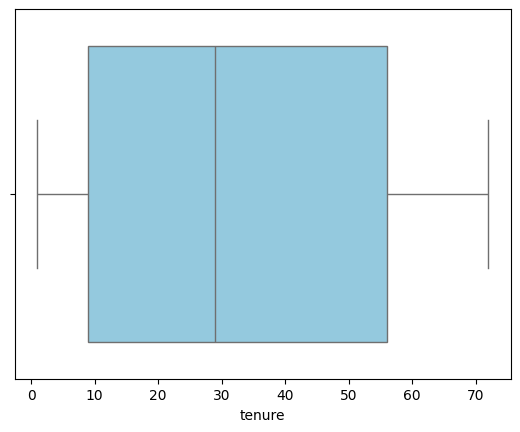

In [596]:
#plt.figure(figsize=(9,8))
sns.boxplot(x=df['tenure'],flierprops=dict(markerfacecolor='red', marker='o'), color='Skyblue')
plt.show()

Univariate Analysis

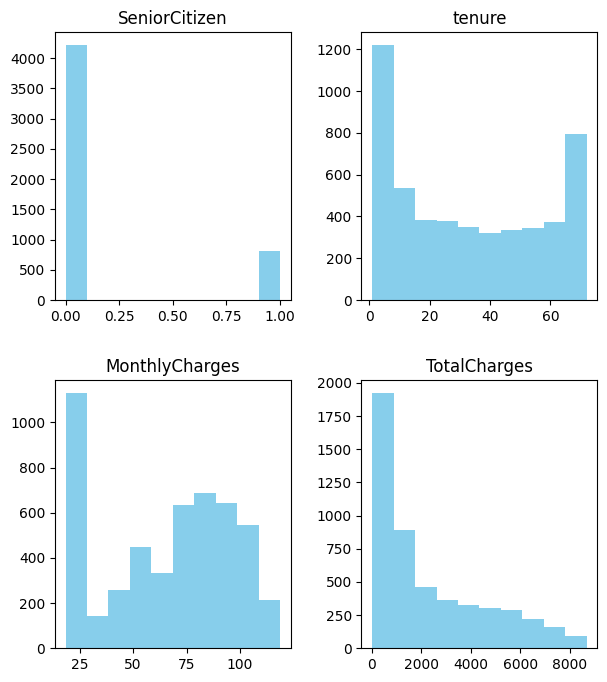

In [574]:
df.hist(figsize=(7,8), grid=False, color='skyblue')
plt.show()

Key insight

Based on the plot above, it is observed that none of the variable's data point distributions adhere to the Gaussian distribution assumptions. Therefore, there is a need to transform the variables for further analysis.

BIVARIATE ANALYSIS

In [575]:
# Find the correlation between the variables
var_corr = df.corr(numeric_only=True)
var_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.003674,0.221585,0.095214
tenure,0.003674,1.000000,0.240001,0.826264
MonthlyCharges,0.221585,0.240001,1.000000,0.647007
TotalCharges,0.095214,0.826264,0.647007,1.000000


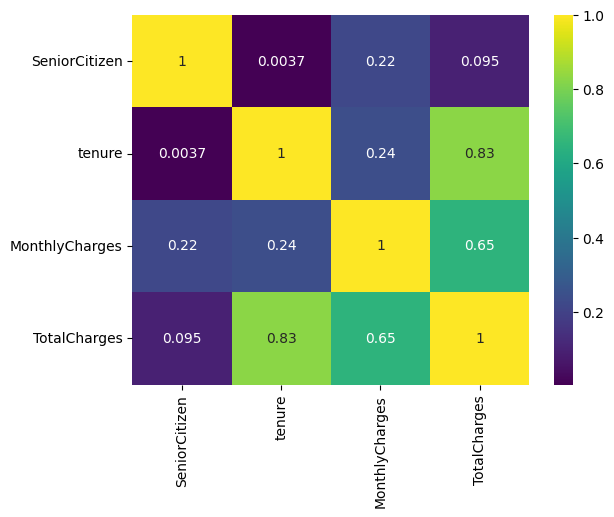

<Figure size 1000x900 with 0 Axes>

In [585]:
# Visualize the correlation with a heatmap
sns.heatmap(data=var_corr,annot=True,cmap='viridis')
plt.figure(figsize=(10,9))
plt.show()



Key insight
 The plot above reveals a moderately strong positive correlation between the variables 'tenure' and 'TotalCharges.' Additionally, there is a moderate positive correlation observed between the variables 'MonthlyCharges' and 'TotalCharges.

MULTIVARIATE ANALYSIS

<Figure size 1500x1200 with 0 Axes>

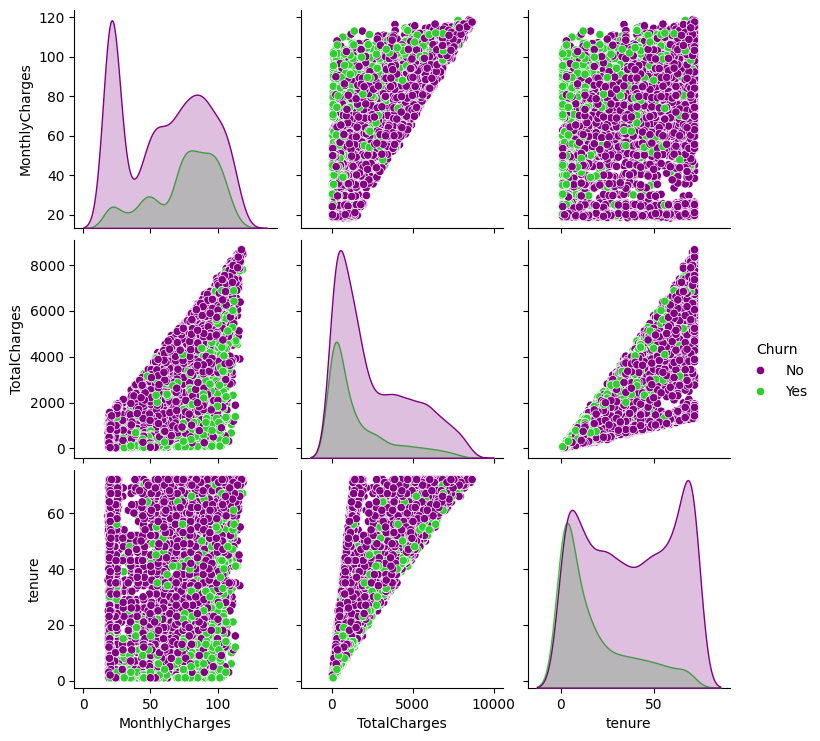

In [586]:
data = df[['Churn', 'MonthlyCharges', 'TotalCharges','tenure']]

# Define a custom palette with colors for 'Yes' and 'No'
custom_palette = {'Yes':'Limegreen','No':'Purple'}

# Use 'Churn' as the hue and provide the custom palette
plt.figure(figsize=(15,12))
sns.pairplot(data, hue='Churn', palette=custom_palette)
plt.show()

Key insight
Based on the plot above, it appears that customers with higher MonthlyCharges exhibit a tendency to both churn and remain with the company. Similarly, customers with lower TotalCharges also show a propensity to both churn and stay. Further analysis is needed to gain a clearer understanding and resolve the ambiguity in these patterns. Customers with lower tenure churn and customer higher tenure stay. 

ANSWERING THE ANALYTICAL QUESTIONS

1. Is there a significant difference in churn rates between different demographic groups, such as gender, senior citizens, customers with partners, and those with dependents?
2. Do customers subscribing to additional services (e.g., online security, device protection) exhibit different churn behavior compared to those who do not?
3. What is the impact of different types of contracts (month-to-month, one year, two years) on customer churn rates? Are customers with longer-term contracts more loyal?
4. Does the quality of the network, including the presence of service outages, influence customer satisfaction and subsequently impact churn rates?
5. Are long-term customers less likely to churn compared to newer ones?

1. Is there a significant difference in churn rates between different demographic groups, such as gender, senior citizens, customers with partners, and those with dependents?

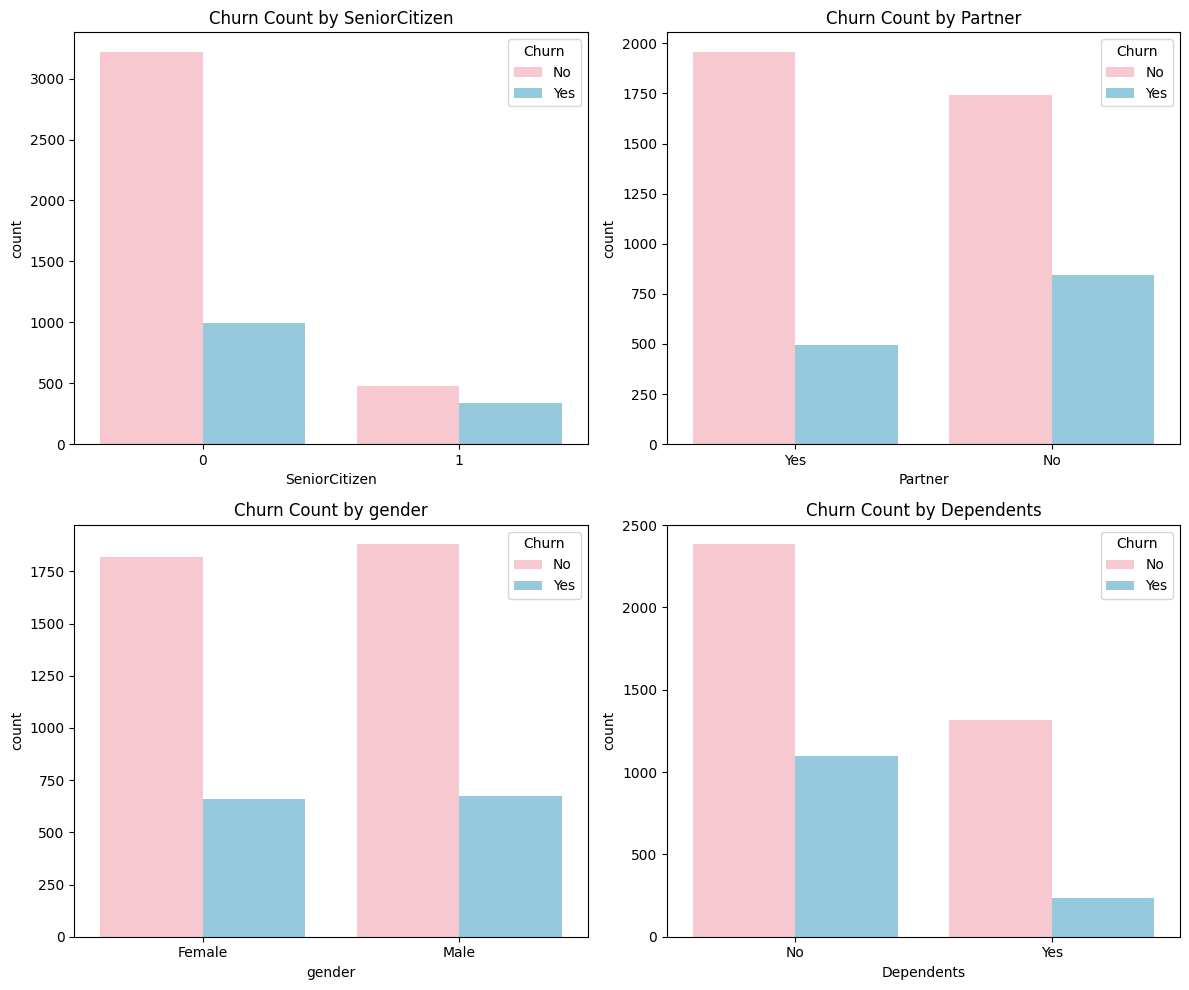

In [588]:
# List the columns and assign them to a variable
categories = ['SeniorCitizen', 'Partner', 'gender', 'Dependents']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier indexing and iteration inside the loop
axes = axes.flatten()

# Set color palette
color_palette = {'Yes':'Skyblue','No':'Pink'}

# Loop through categories and create count plots
for i, category in enumerate(categories):
    sns.countplot(x=category, hue='Churn', data=df, hue_order=['No', 'Yes'], palette=color_palette, ax=axes[i])
    axes[i].set_title(f'Churn Count by {category}')

# Adjust layout
plt.tight_layout()
plt.show()

Key Insight
Based on the visualizations presented above, it appears that there isn't a substantial distinction in churn rates across various demographic factors. This observation stems from the consistent trend of a higher number of customers staying compared to those who churn.

2. Do customers subscribing to additional services (e.g., online security, device protection,tech support and onlinebackup) exhibit different churn behavior compared to those who do not?

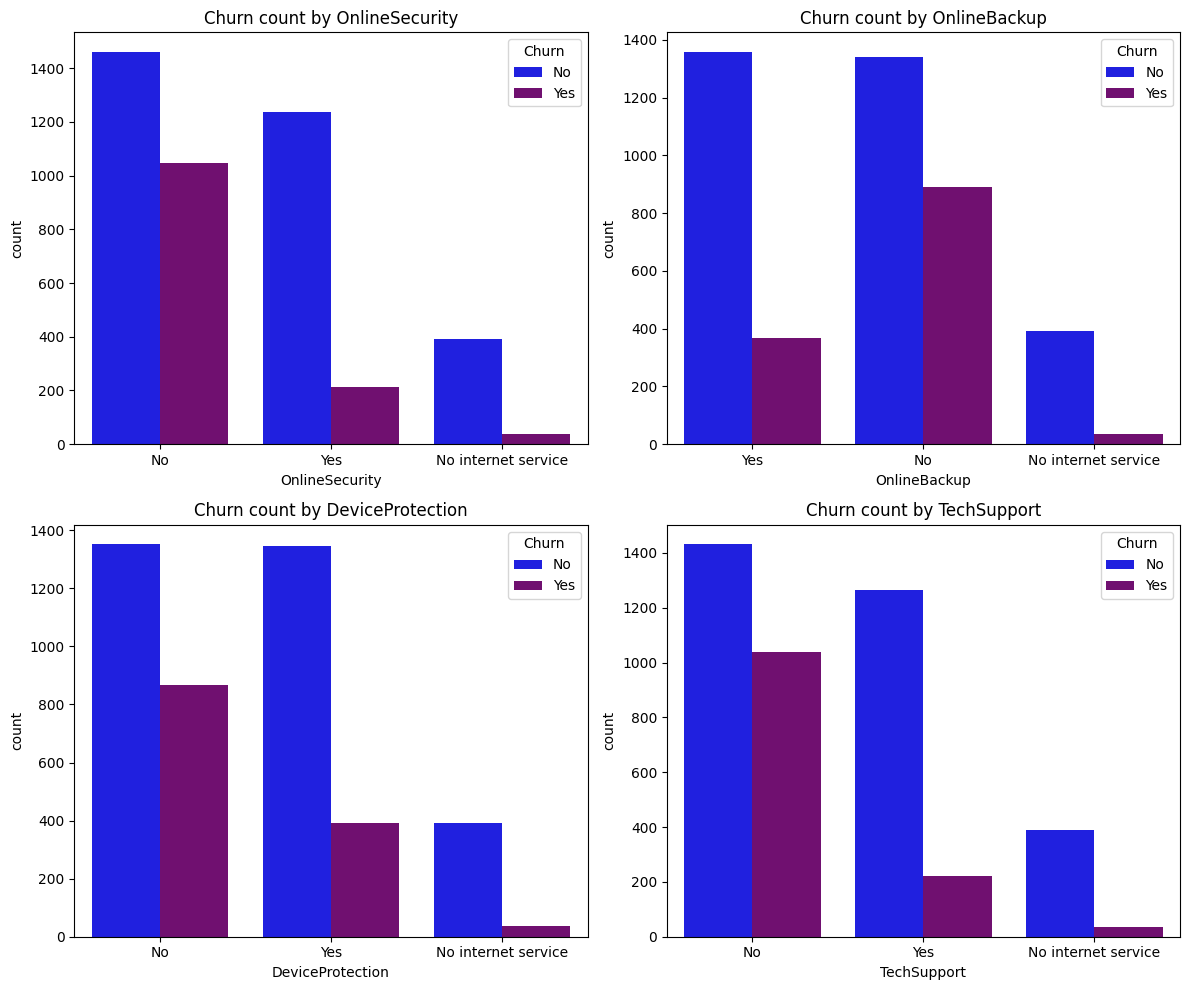

In [589]:
# Store the services in a variable called additional_service
additionalservices =['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
# Specify the subplot figsize and the array arrangement
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
# Change the 2D array to 1D to iterate through the loop
axes = axes.flatten()
# set the color palette
color_pal ={'Yes':'Purple','No':'blue'}
# Loop through the additional_services and create countplot
for i, service in enumerate(additionalservices):
    sns.countplot(x=service, data=df,hue='Churn', hue_order=['No', 'Yes'], palette=color_pal,ax=axes[i])
    axes[i].set_title(f'Churn count by {service}')
# Add layout to avoid overlapping
plt.tight_layout()
plt.show()

Key insight

Based on the insights derived from the above analysis, it appears that the provision of additional services does not have a substantial impact on the churn rate. The majority of customers tend to retain these services rather than opting for churn.